In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import plotly.express as px
import warnings
import json

In [2]:
with open('fashion_products_dataset.json') as f:
    data = json.load(f)

In [3]:
file_path = 'fashion_products_dataset.json'
df = pd.read_json(file_path)
df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [4]:
df.shape

(30000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              30000 non-null  object        
 1   actual_price     30000 non-null  object        
 2   average_rating   30000 non-null  object        
 3   brand            30000 non-null  object        
 4   category         30000 non-null  object        
 5   crawled_at       30000 non-null  datetime64[ns]
 6   description      30000 non-null  object        
 7   discount         30000 non-null  object        
 8   images           30000 non-null  object        
 9   out_of_stock     30000 non-null  bool          
 10  pid              30000 non-null  object        
 11  product_details  30000 non-null  object        
 12  seller           30000 non-null  object        
 13  selling_price    30000 non-null  object        
 14  sub_category     30000 non-null  objec

In [6]:
df.isnull().sum()

_id                0
actual_price       0
average_rating     0
brand              0
category           0
crawled_at         0
description        0
discount           0
images             0
out_of_stock       0
pid                0
product_details    0
seller             0
selling_price      0
sub_category       0
title              0
url                0
dtype: int64

In [7]:
df['brand'].value_counts()

brand
              2068
ARBO           999
Pu             996
True Bl        996
REEB           996
              ... 
UGAM FASHI       1
ud fabr          1
Modenti          1
PIS              1
G creati         1
Name: count, Length: 325, dtype: int64

In [8]:
df['category'].value_counts()

category
Clothing and Accessories    28971
Footwear                      987
Bags, Wallets & Belts          41
Toys                            1
Name: count, dtype: int64

In [9]:
df['sub_category'].value_counts()

sub_category
Topwear                                 16575
Bottomwear                               3862
Winter Wear                              2753
Innerwear and Swimwear                   1774
Clothing Accessories                     1760
Kurtas, Ethnic Sets and Bottoms          1248
Men's Footwear                            987
Fabrics                                   535
Blazers, Waistcoats and Suits             136
Sleepwear                                 122
Tracksuits                                 90
Raincoats                                  34
Uber Urban Clothing and Accessories        28
Inspire Clothing and Accessories           23
Sunshopping Bags, Wallets & Belts          21
Crocks Club Clothing and Accessories       15
Roy Clothing and Accessories               12
SUNSHOPPING Bags, Wallets & Belts          10
INSPIRE Clothing and Accessories            4
Winsome Deal Bags, Wallets & Belts          4
YOFAMA Bags, Wallets & Belts                4
Party Supplies       

In [10]:
df['out_of_stock'].value_counts()

out_of_stock
False    28258
True      1742
Name: count, dtype: int64

# Product categories & brands

<Axes: xlabel='category', ylabel='count'>

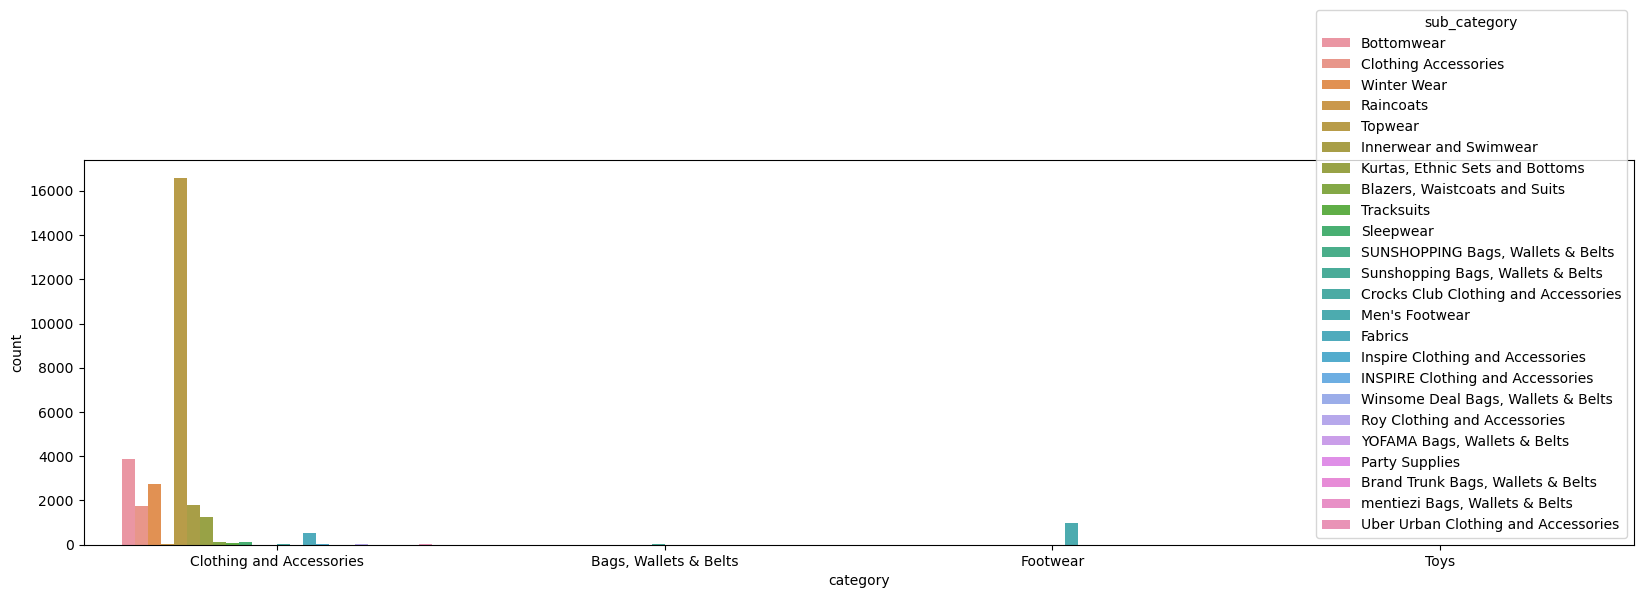

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(data = df , x = 'category' ,hue = 'sub_category' )

In [12]:
def plot(df , figsize , subplot):
    
    plt.figure(figsize = figsize)
    for index , column in enumerate(df.columns):
        plt.subplot(*subplot , index+1)
        sns.histplot(df[column])
        plt.xticks(rotation = 'vertical')
        

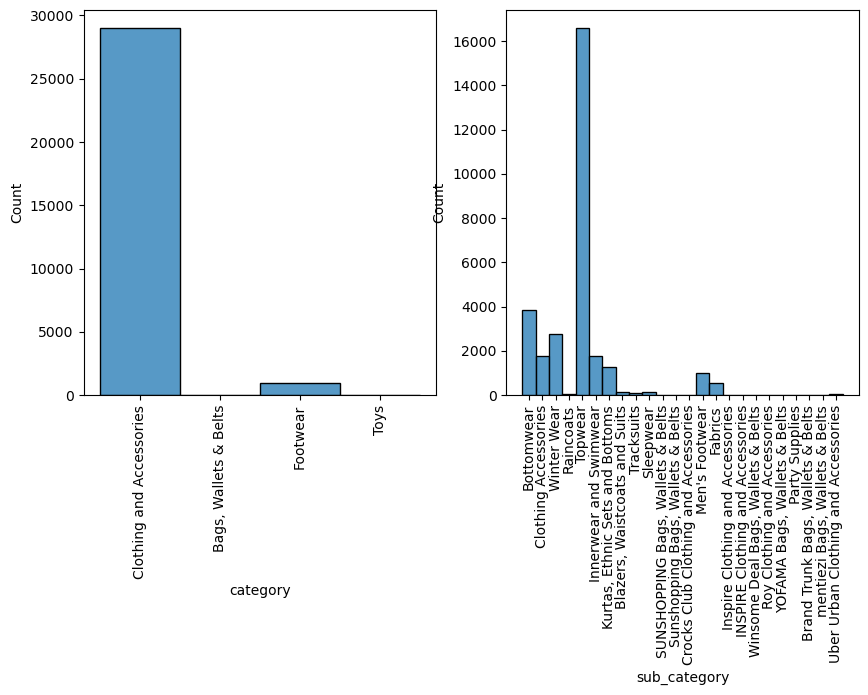

In [13]:
plot(df[['category','sub_category']],(10,5),(1,2))

In [14]:
brand_counts = df['brand'].nunique()
brand_counts

325

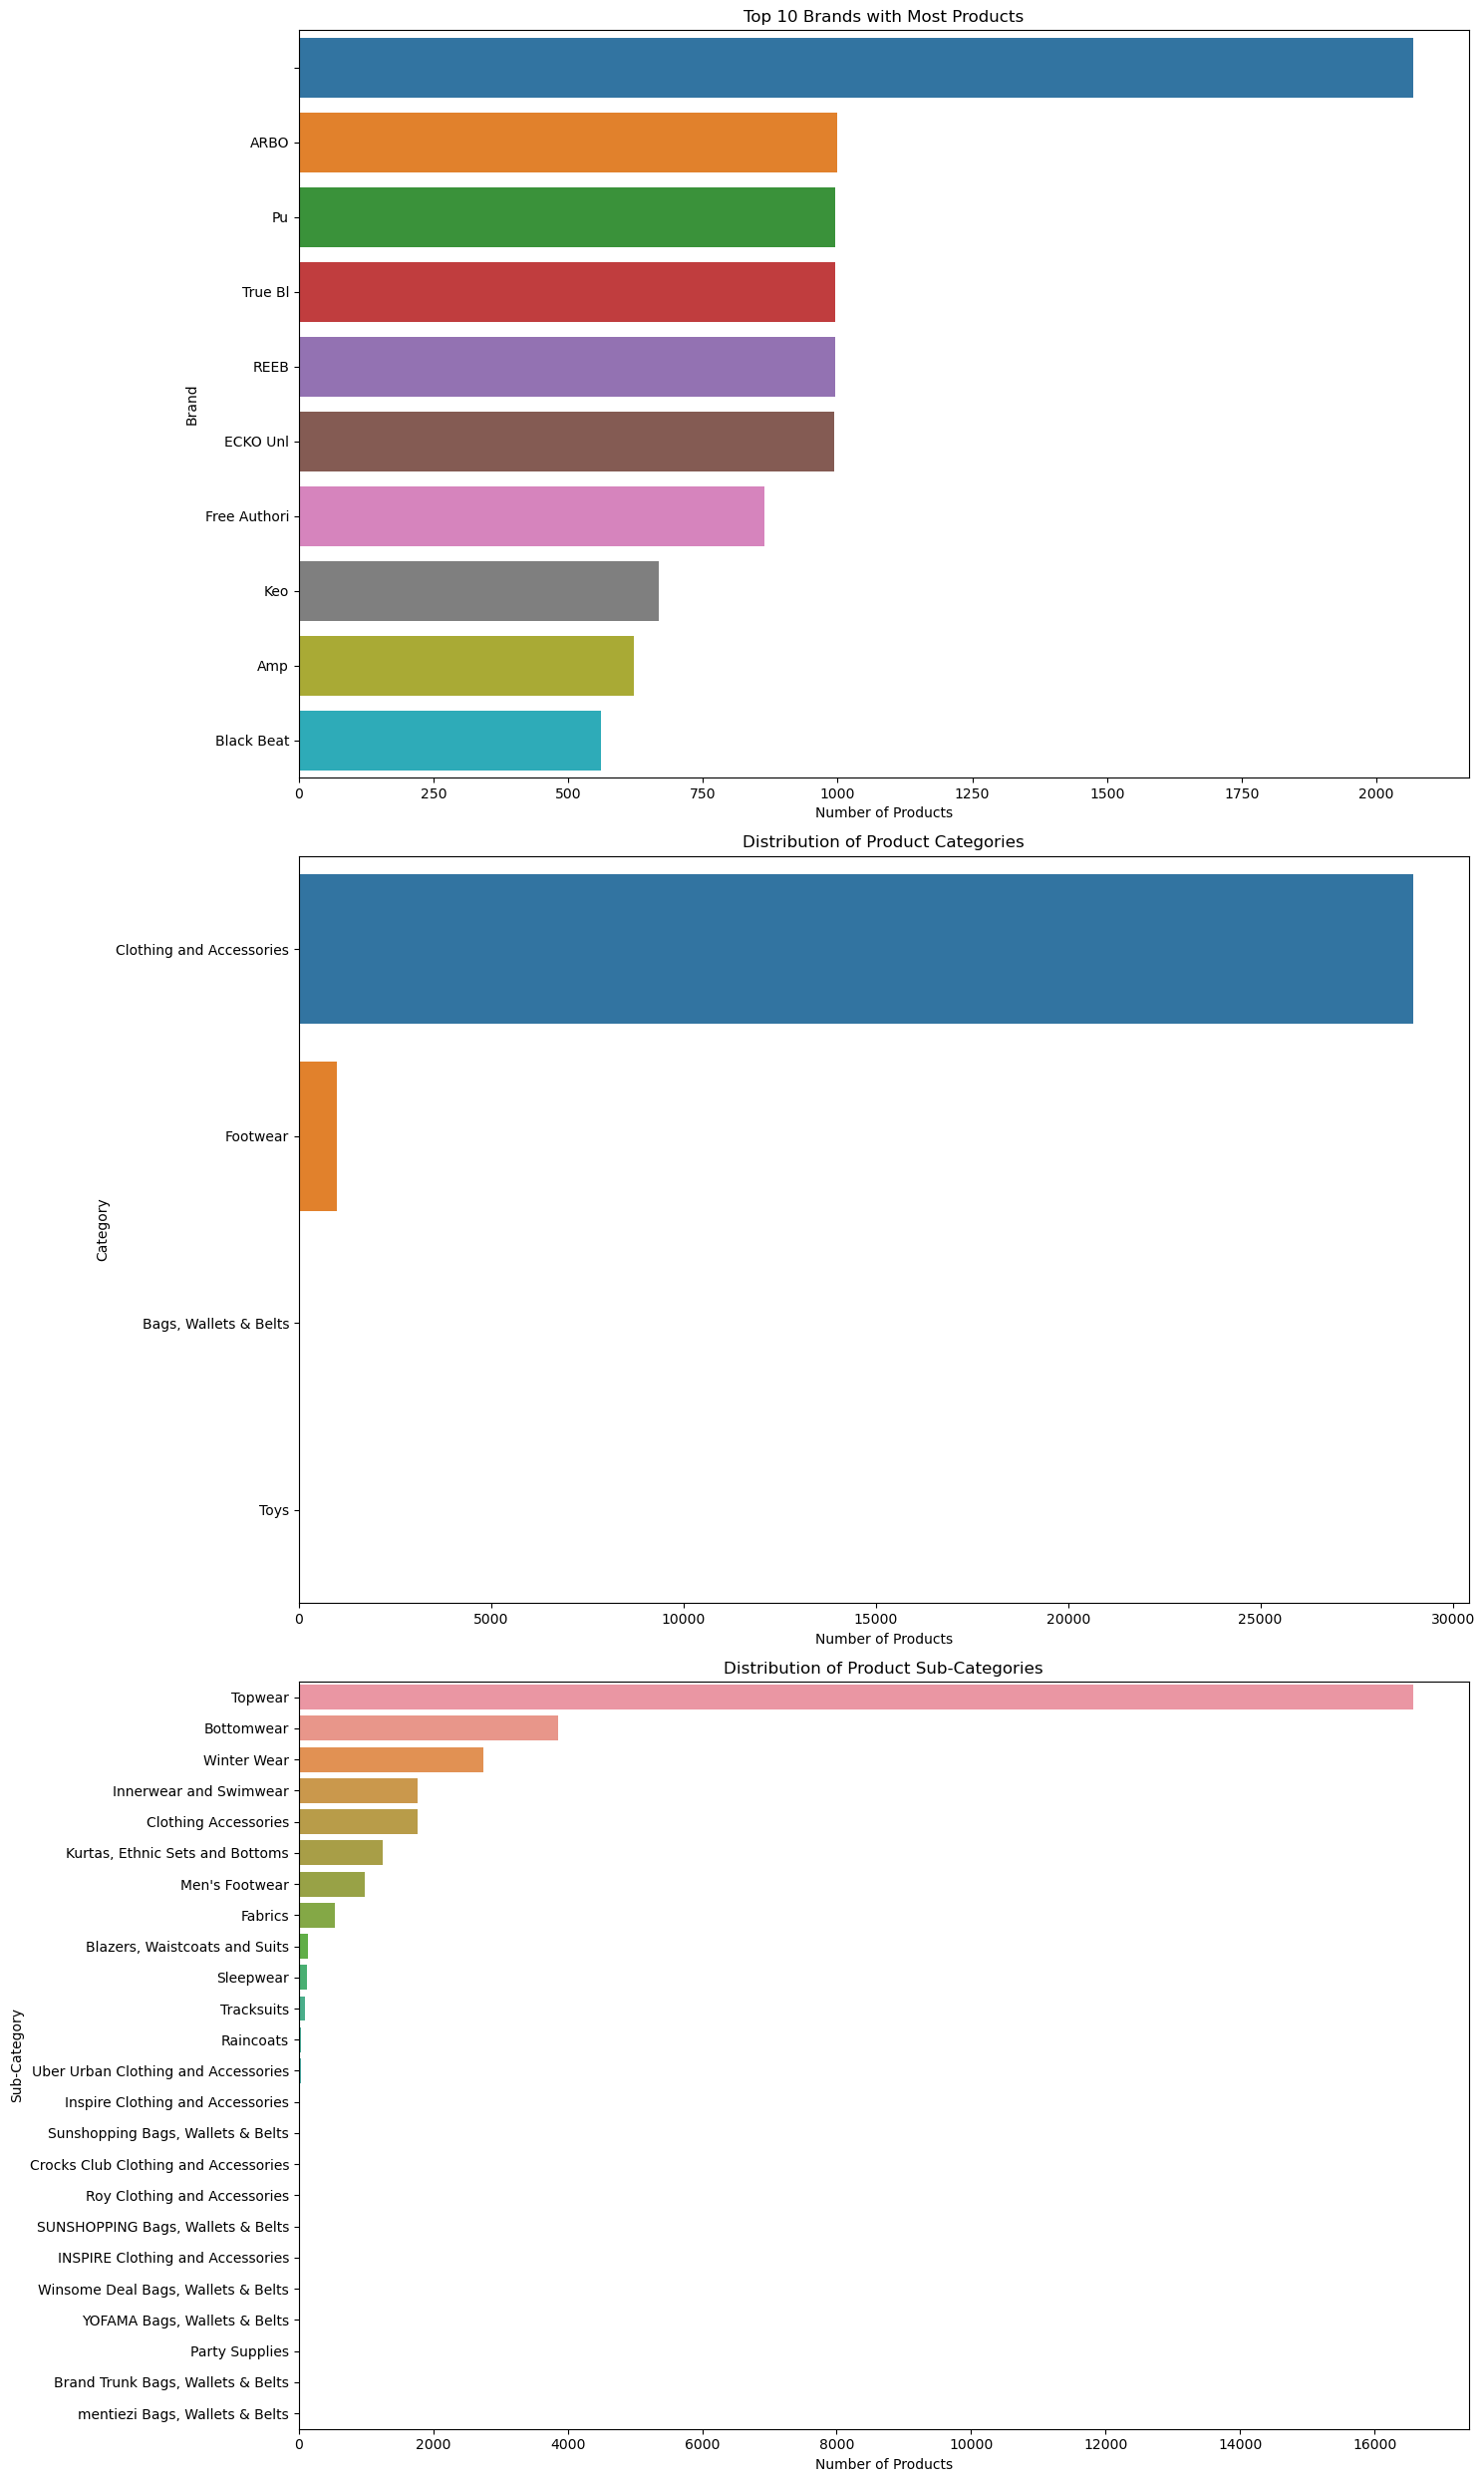

In [15]:
top_brands = df['brand'].value_counts()[:10]

# Distribution of product categories in the cleaned dataset
category = df['category'].value_counts()

# Distribution of product sub-categories in the cleaned dataset
sub_category = df['sub_category'].value_counts()

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(15, 25))

# Top 10 brands with the most products
sns.barplot(x=top_brands.values, y=top_brands.index, ax=ax[0])
ax[0].set_title('Top 10 Brands with Most Products')
ax[0].set_xlabel('Number of Products')
ax[0].set_ylabel('Brand')

# Distribution of product categories
sns.barplot(x=category.values, y=category.index, ax=ax[1])
ax[1].set_title('Distribution of Product Categories')
ax[1].set_xlabel('Number of Products')
ax[1].set_ylabel('Category')

# Distribution of product sub-categories
sns.barplot(x=sub_category.values, y=sub_category.index, ax=ax[2])
ax[2].set_title('Distribution of Product Sub-Categories')
ax[2].set_xlabel('Number of Products')
ax[2].set_ylabel('Sub-Category')

plt.tight_layout()
plt.show()

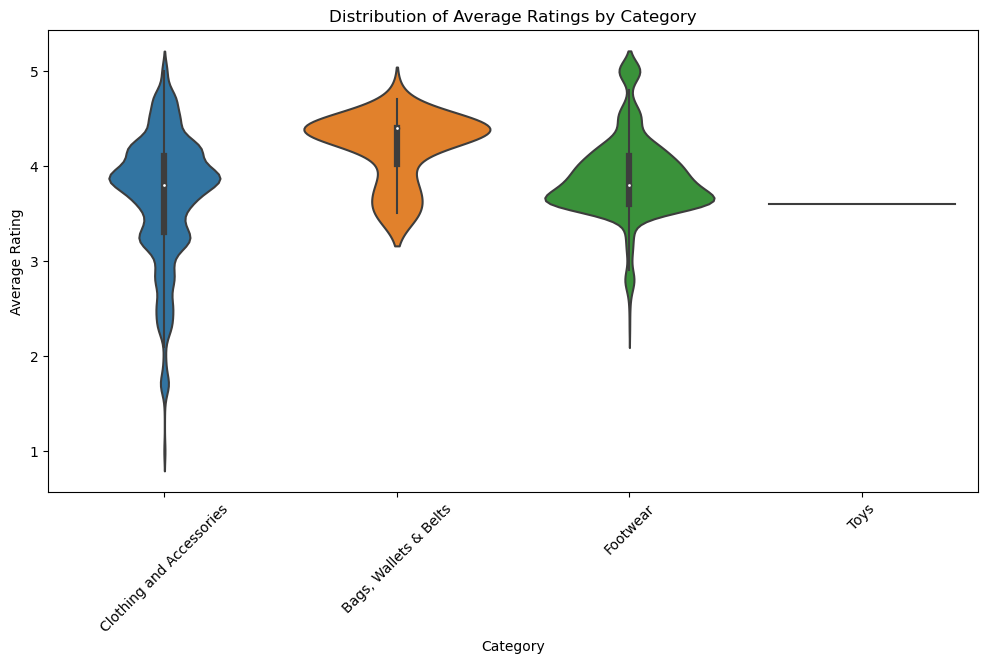

In [53]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='average_rating', data=df)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Distribution of Average Ratings by Category')
plt.show()

In [17]:
# we first find the range of prices for all the brand 
brand_ranges = df.groupby('brand')['actual_price'].agg(['min', 'max'])
brand_ranges.head() 

,min,max
brand,,
,,999
A,"1,199",999
A J STYL,"1,299",999
A to Z life sty,699,699
A2Z QUALITY GROU,"1,290",989


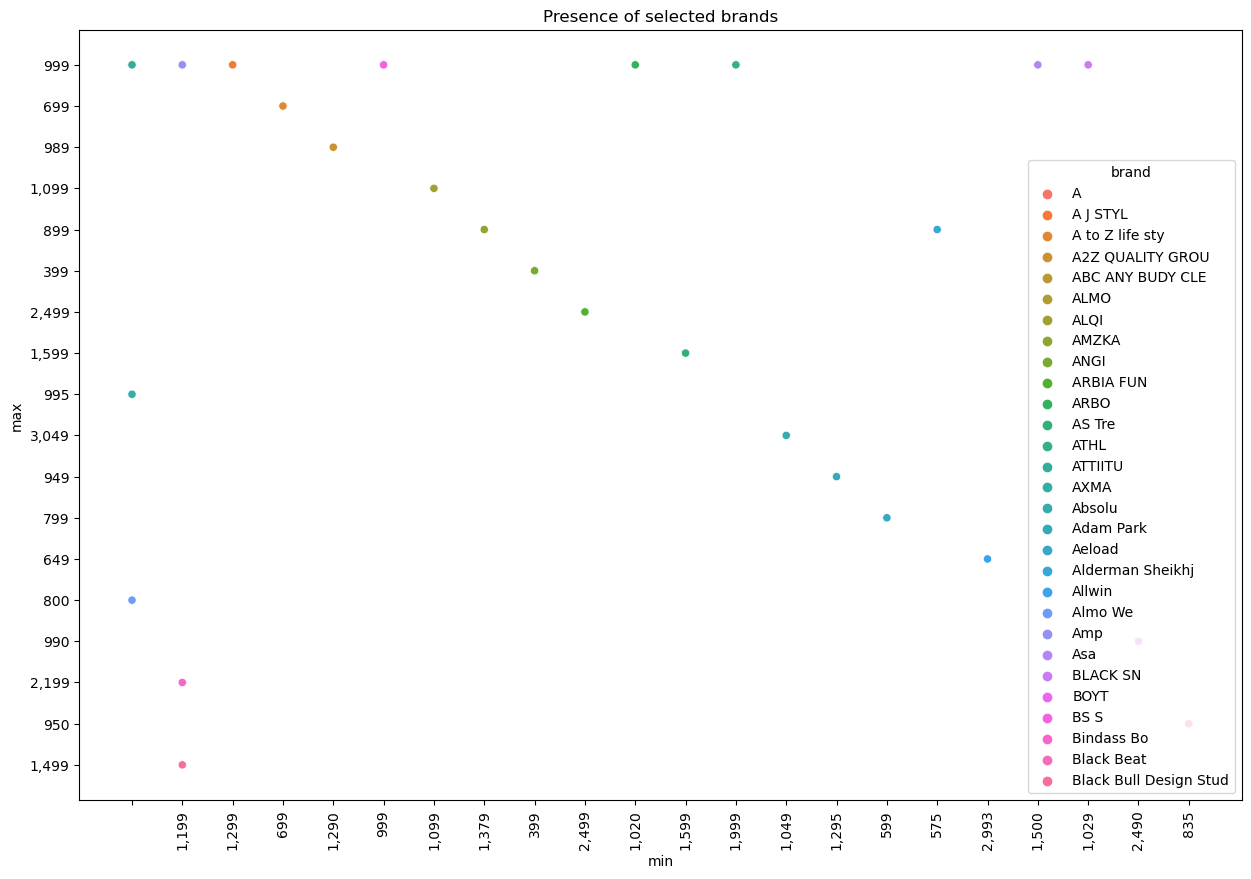

In [29]:
# Filter the brand_ranges DataFrame for the specified brands
brands_filtered = brand_ranges.iloc[0:30]

plt.figure(figsize=(15, 10))

# Scatter plot for filtered brands
sns.scatterplot(data=brands_filtered, x='min', y='max', hue=brands_filtered.index)
plt.xticks(rotation='vertical')
plt.title("Presence of selected brands")
plt.show()

# Pricing

TypeError: reduction operation 'argmin' not allowed for this dtype

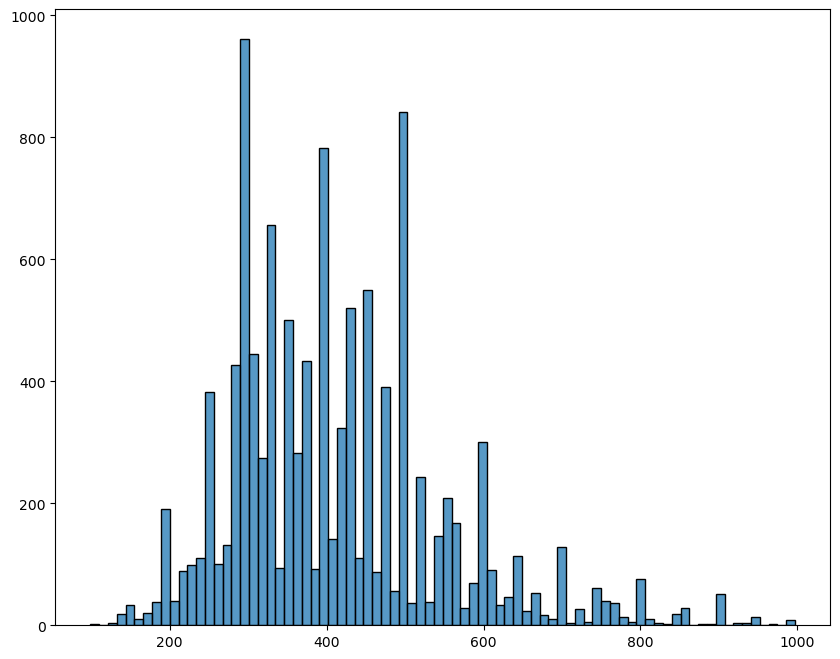

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the columns to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['actual_price', 'selling_price'], inplace=True)

# Plot histograms
plt.figure(figsize=(10, 8))
sns.histplot(df['selling_price'], bins=80, label='selling_price')
sns.histplot(df['actual_price'], bins=80, label='actual_price')
plt.legend()
plt.show()


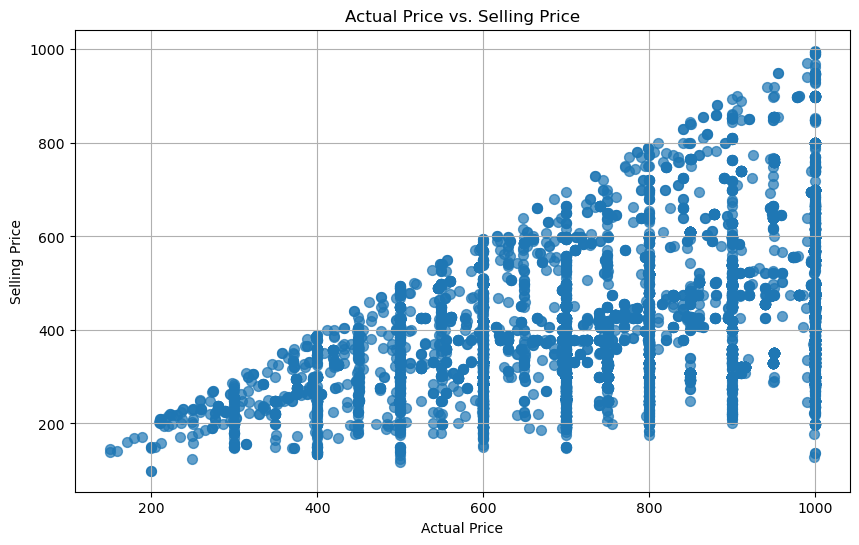

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['selling_price'], s=50, alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Selling Price')
plt.title('Actual Price vs. Selling Price')
plt.grid(True)
plt.show()

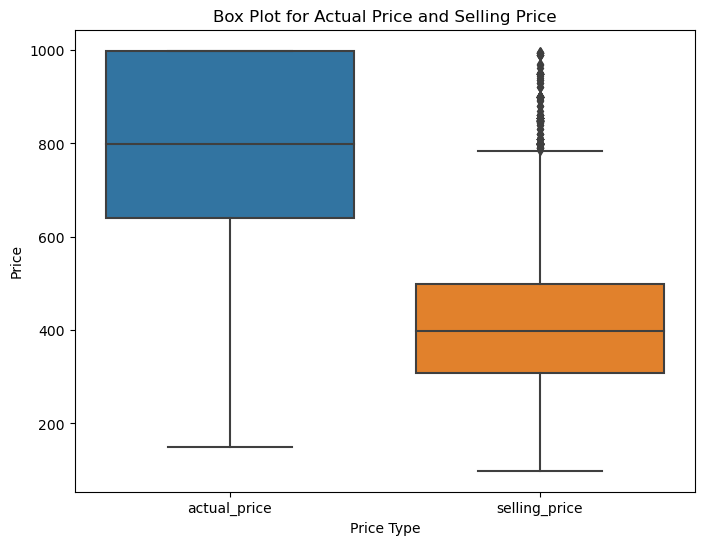

In [38]:
df.dropna(subset=['actual_price', 'selling_price'], inplace=True)
df['actual_price'].fillna(0, inplace=True)
df['selling_price'].fillna(0, inplace=True)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['actual_price', 'selling_price']])
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Box Plot for Actual Price and Selling Price')
plt.show()

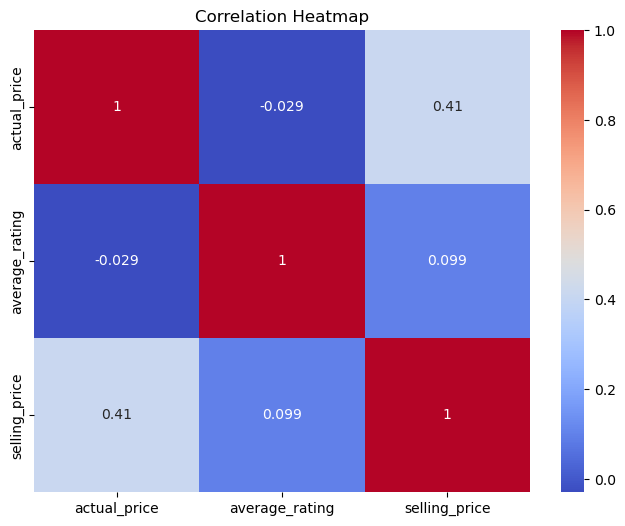

In [40]:
df[['actual_price', 'average_rating', 'selling_price']] = df[['actual_price', 'average_rating', 'selling_price']].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=['actual_price', 'average_rating', 'selling_price'], inplace=True)
correlation_matrix = df[['actual_price', 'average_rating', 'selling_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


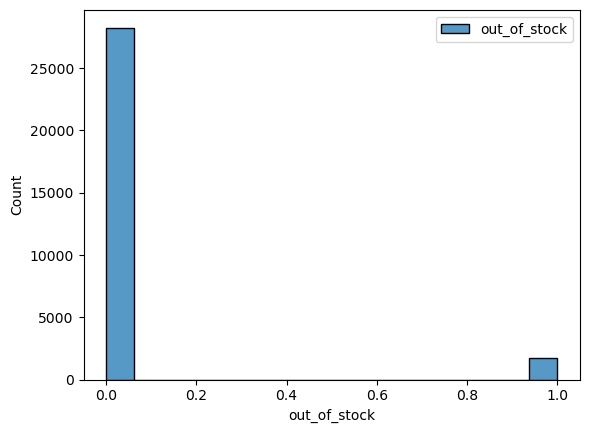

In [23]:
sns.histplot(df['out_of_stock'],label='out_of_stock')
plt.legend()
plt.show()

# seller performance

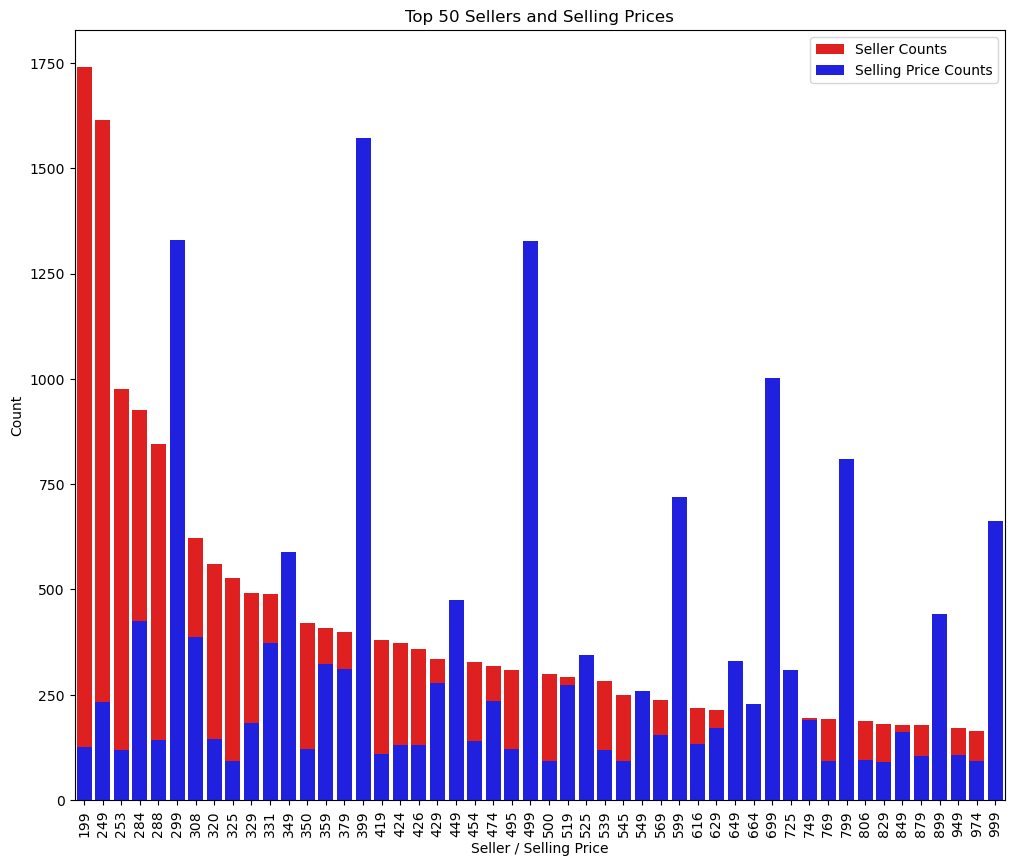

In [28]:
# Consider top 50 sellers
seller_counts = df['seller'].value_counts().head(50)
# Consider top 50 selling prices
selling_price_counts = df['selling_price'].value_counts().head(50)

plt.figure(figsize=(12, 10))
sns.barplot(x=seller_counts.index, y=seller_counts.values, color='red', label='Seller Counts')
sns.barplot(x=selling_price_counts.index, y=selling_price_counts.values, color='blue', label='Selling Price Counts')
plt.xticks(rotation='vertical')
plt.xlabel('Seller / Selling Price')
plt.ylabel('Count')
plt.title('Top 50 Sellers and Selling Prices')
plt.legend()
plt.show()

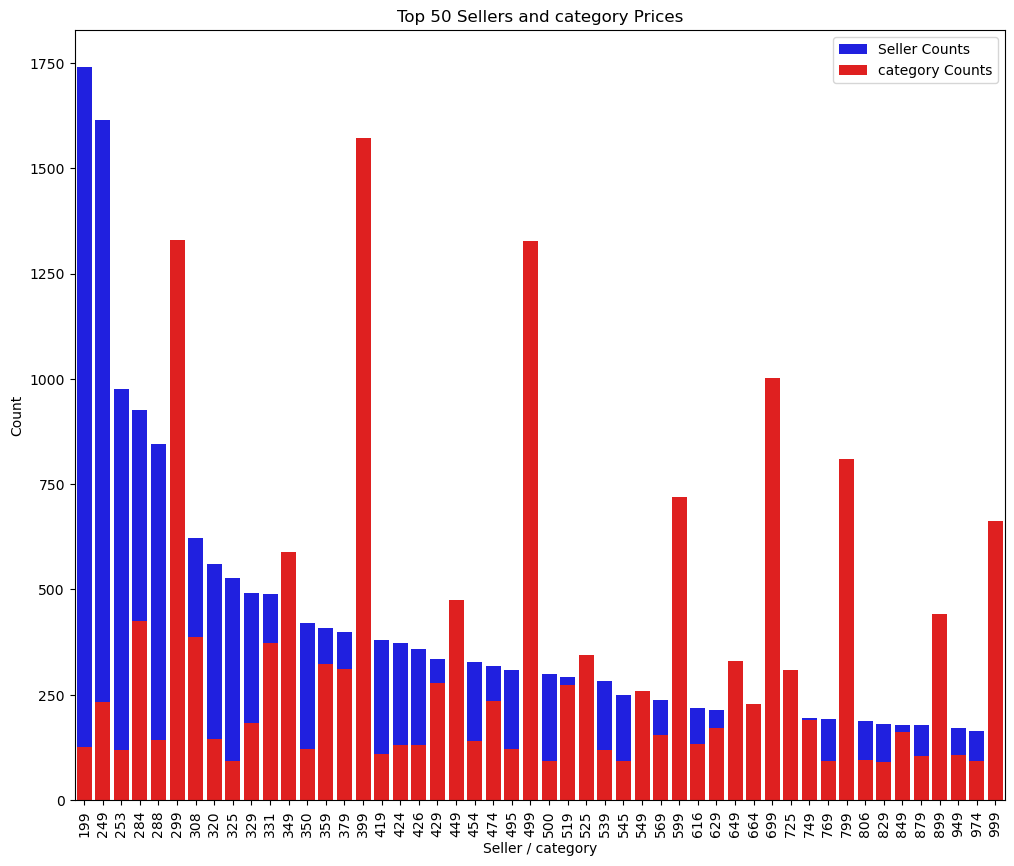

In [27]:
# Consider top 50 sellers
seller_counts = df['seller'].value_counts().head(50)
# Consider top 50 selling prices
category_counts = df['category'].value_counts().head(50)

plt.figure(figsize=(12, 10))
sns.barplot(x=seller_counts.index, y=seller_counts.values, color='blue', label='Seller Counts')
sns.barplot(x=selling_price_counts.index, y=selling_price_counts.values, color='red', label='category Counts')
plt.xticks(rotation='vertical')
plt.xlabel('Seller / category')
plt.ylabel('Count')
plt.title('Top 50 Sellers and category Prices')
plt.legend()
plt.show()

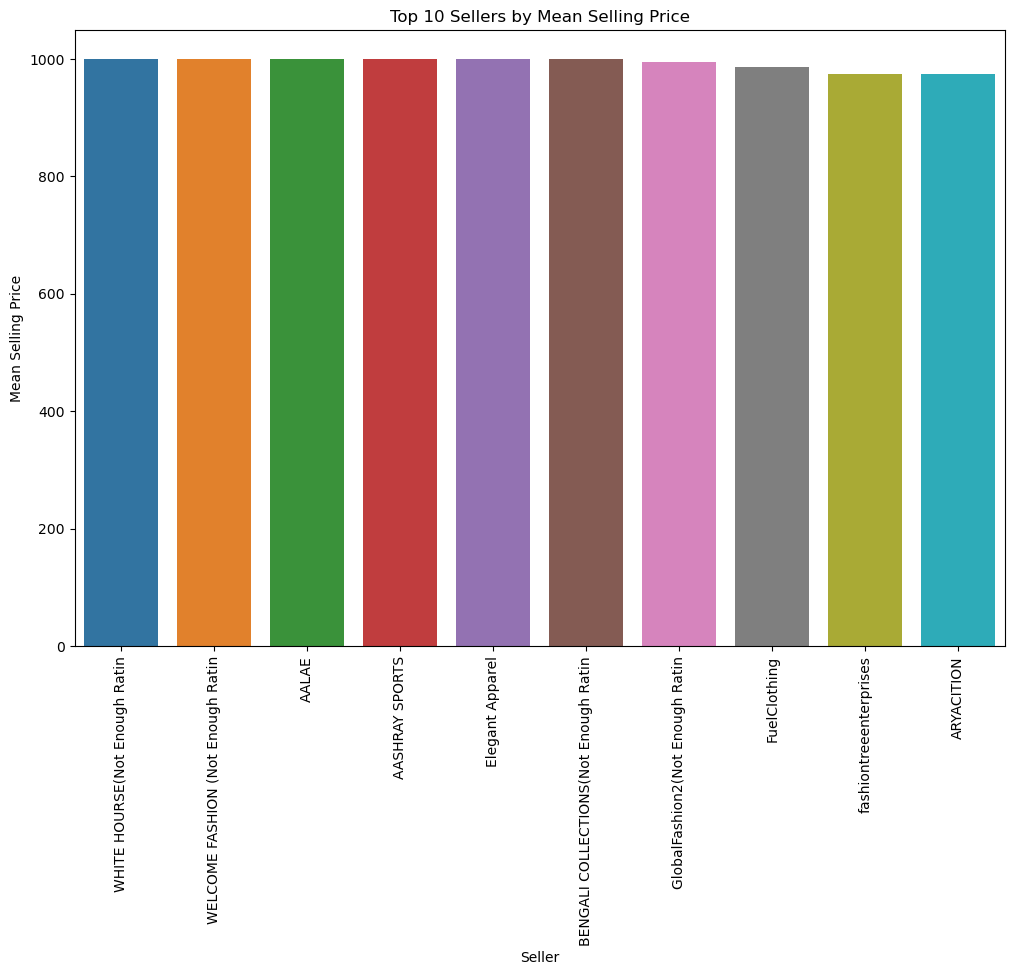

In [26]:
seller_stats = df.groupby('seller')['selling_price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=seller_stats.index, y=seller_stats.values)
plt.xticks(rotation='vertical')
plt.xlabel('Seller')
plt.ylabel('Mean Selling Price')
plt.title('Top 10 Sellers by Mean Selling Price')
plt.show()


# Customer preferences

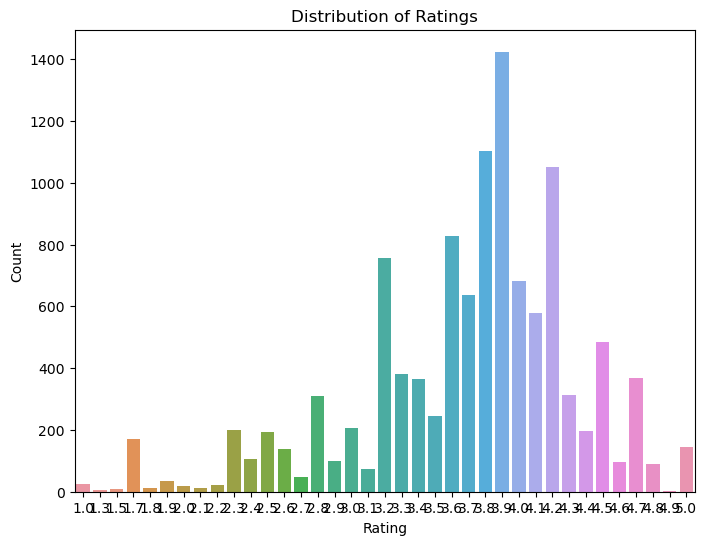

In [46]:
# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='average_rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



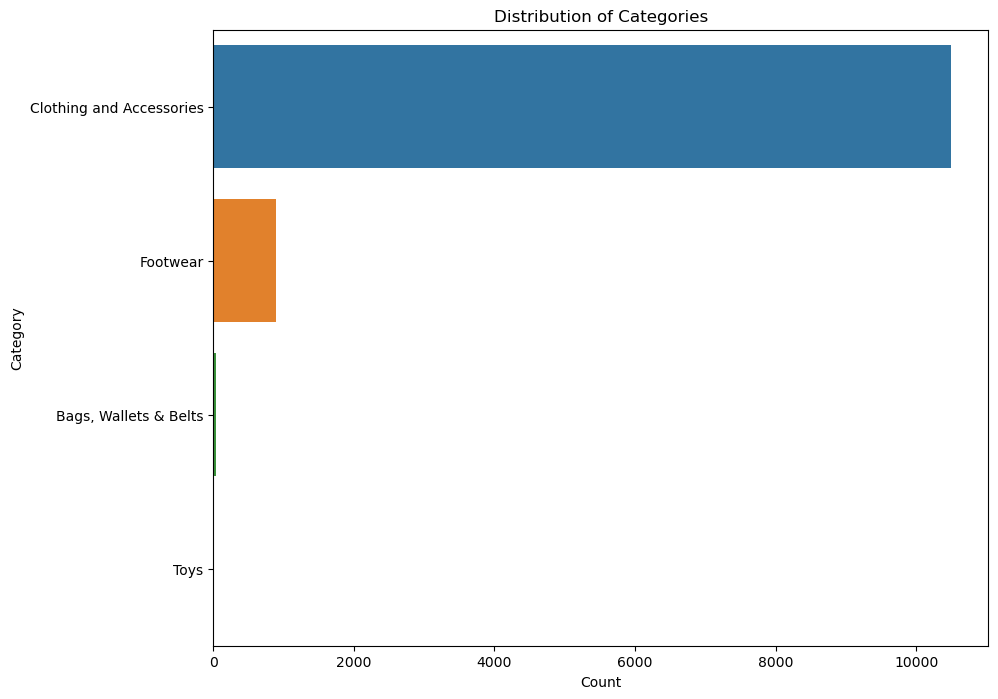

In [47]:
# Distribution of categories
plt.figure(figsize=(10, 8))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()



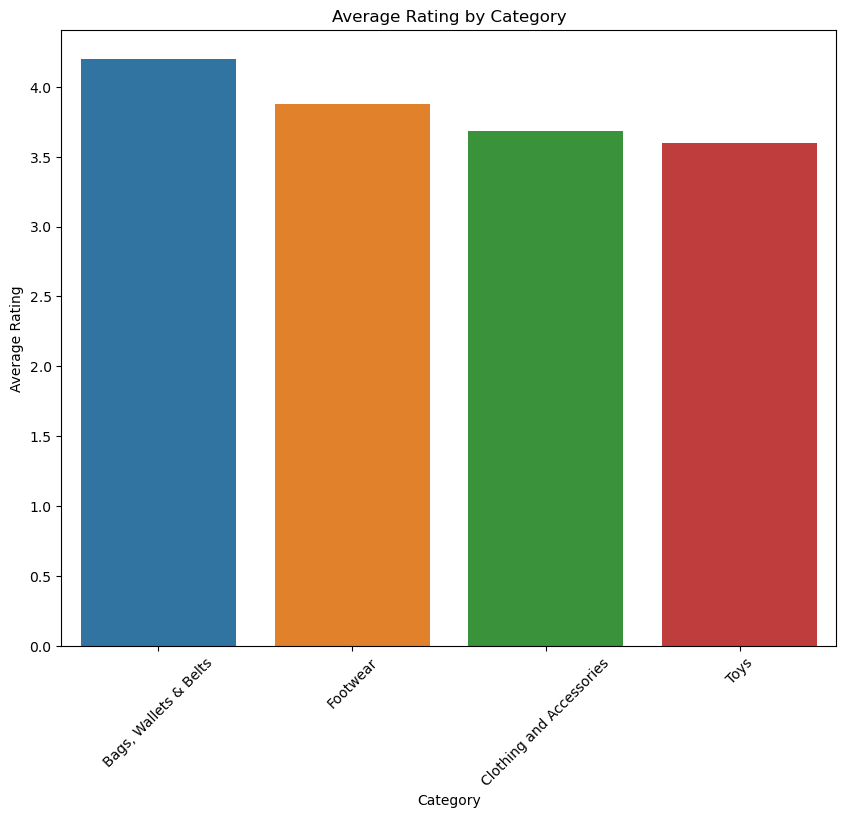

In [48]:
# Customer satisfaction analysis
# Average rating by category
avg_rating_by_category = df.groupby('category')['average_rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

